### Notebook to read NIfTY files

This notebook is used to read different nifty files:
- fMRI data
- MVPA data
- anatomical data
- best feature mask

In [85]:
import nibabel as nib
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from functions.function_plot_3d_array_colored import plot_3d_array_colored

### exploration of the dtypes

<class 'nibabel.nifti1.Nifti1Image'>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
sr

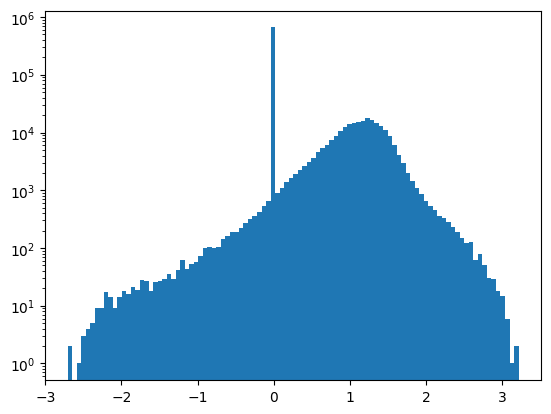

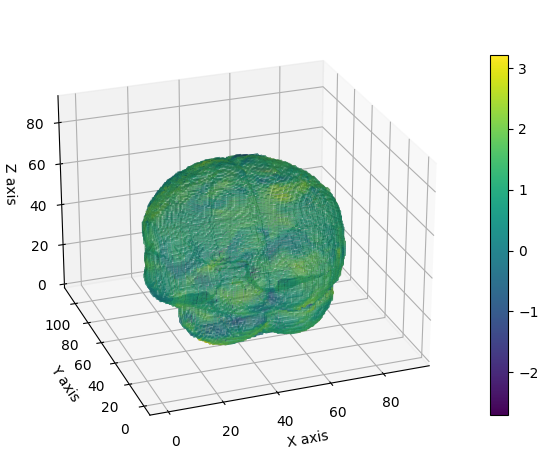

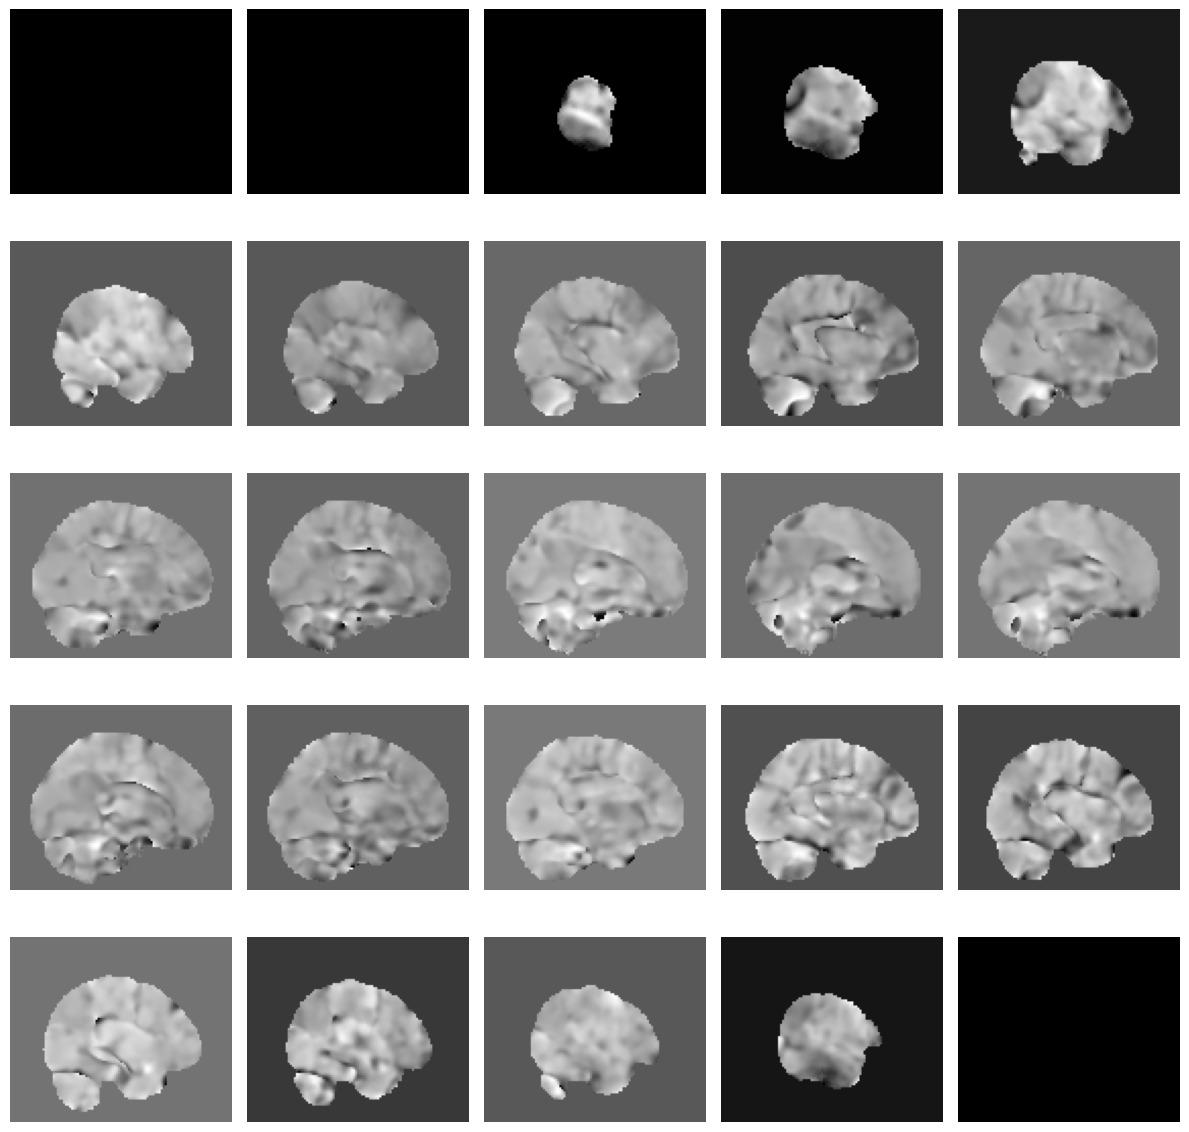

In [76]:
file_path = "../example_data/"

# MVPA data
brain_vol = nib.load(os.path.join(file_path, "preprocessed_MVPA.nii"))

# What is the type of this object?
print(type(brain_vol))

print(brain_vol.header)

brain_vol_data = brain_vol.get_fdata()
print(type(brain_vol_data))
print(brain_vol_data.shape)

# make a histogram from a numpy array
plt.hist(brain_vol_data.flatten(), bins=100, log=True)

print(brain_vol_data.shape)

print(f"{brain_vol_data[(0, 0, 0)]=}")
# make a 3d plot of the brain volume
plot_3d_array_colored(brain_vol_data)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

axs.flat[0].imshow(ndi.rotate(brain_vol_data[0, :, :], 90), cmap="gray")
axs.flat[0].axis("off")

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx+1].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap="gray")
    axs.flat[idx+1].axis("off")

axs.flat[24].imshow(ndi.rotate(brain_vol_data[-1, :, :], 90), cmap="gray")
axs.flat[24].axis("off")

plt.tight_layout()
plt.show()

### read fMRI data (data with 4th dimension = time)

In [77]:
file_path = "../../data/Denoised_Data_6mm"

# # fMRI file
path_content = os.listdir(file_path)
brain_vol = nib.load(os.path.join(file_path, path_content[-1]))
brain_vol_data = brain_vol.get_fdata()

print(f"{type(brain_vol)=}")
print(f"{type(brain_vol_data)=}")
print(f"{brain_vol_data.shape=}")
print(f"{brain_vol.header=}")
print(brain_vol.header)

type(brain_vol)=<class 'nibabel.nifti1.Nifti1Image'>
type(brain_vol_data)=<class 'numpy.memmap'>
brain_vol_data.shape=(91, 109, 91, 1200)
brain_vol.header=<nibabel.nifti1.Nifti1Header object at 0x7f79a6a5f910>
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   91  109   91 1200    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'conn_matc2nii'
aux_file        : b'

## read MVPA data

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0. 90.]
sro

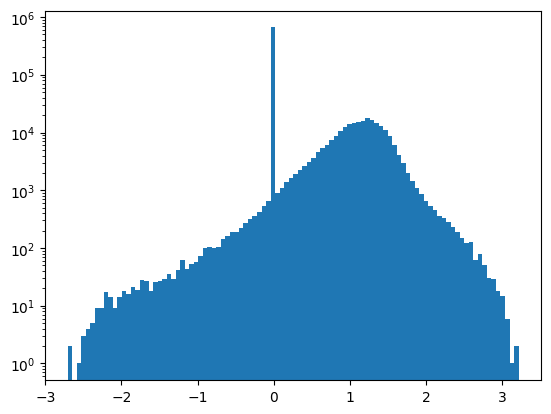

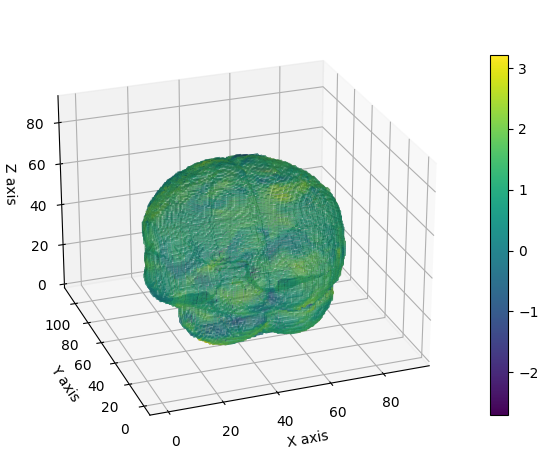

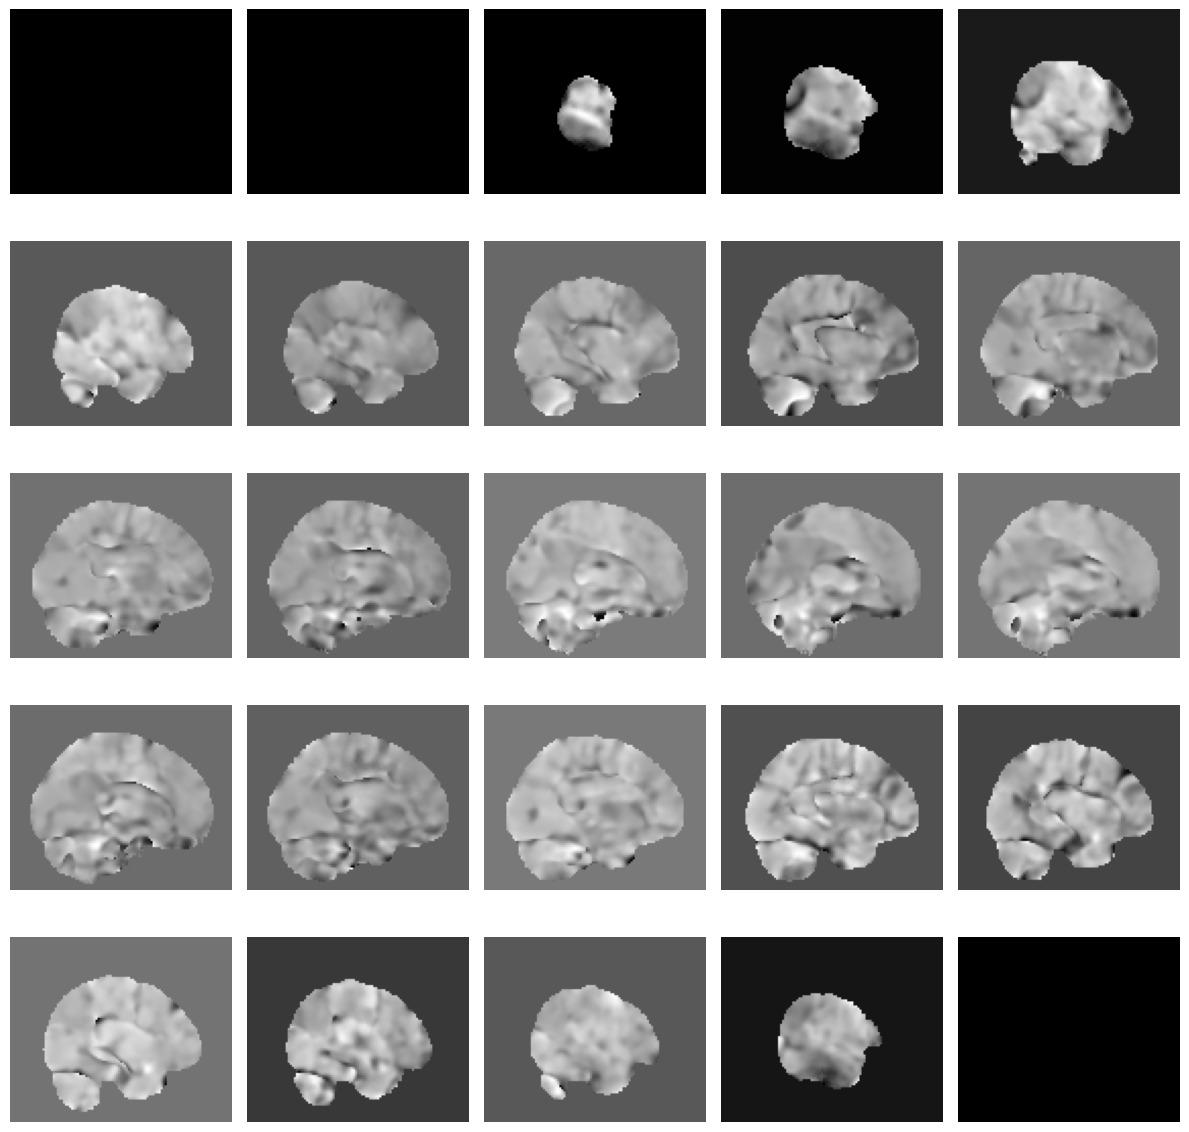

In [78]:
file_path = "../example_data/"

# MVPA data
brain_vol = nib.load(os.path.join(file_path, "preprocessed_MVPA.nii"))
brain_vol_data = brain_vol.get_fdata()
print(brain_vol.header)

# make a histogram from a numpy array
plt.hist(brain_vol_data.flatten(), bins=100, log=True)

# make a 3d plot of the brain volume
plot_3d_array_colored(brain_vol_data)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

axs.flat[0].imshow(ndi.rotate(brain_vol_data[0, :, :], 90), cmap="gray")
axs.flat[0].axis("off")

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx+1].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap="gray")
    axs.flat[idx+1].axis("off")

axs.flat[24].imshow(ndi.rotate(brain_vol_data[-1, :, :], 90), cmap="gray")
axs.flat[24].axis("off")

plt.tight_layout()
plt.show()

## read anatomic image

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'NIFTI-1 Image'
aux_file        : b''
qform_code      : aligned
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-2.  0.  0

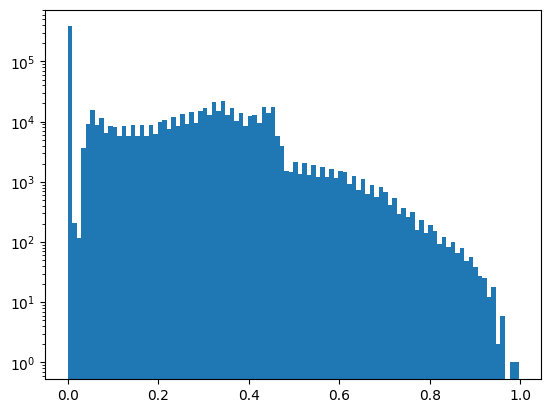

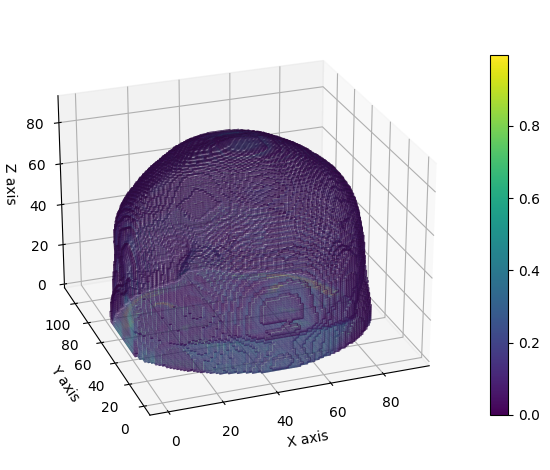

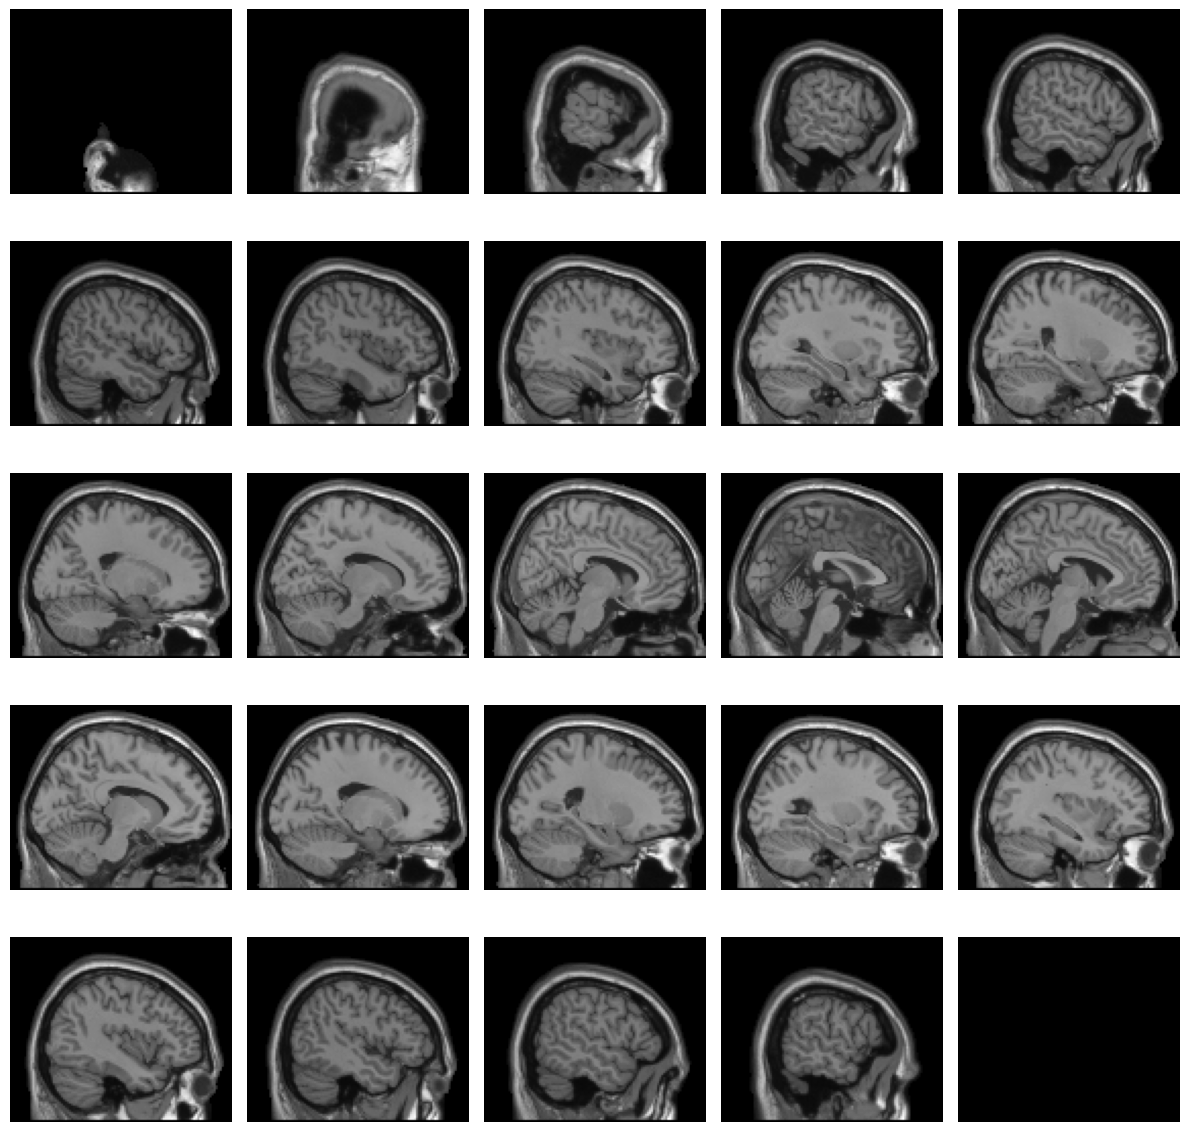

In [84]:
file_path = "../example_data/"
brain_vol = nib.load(os.path.join(file_path, "anatomic_scan_T1.nii"))
brain_vol_data = brain_vol.get_fdata()
print(brain_vol.header)

# make a histogram from a numpy array
plt.hist(brain_vol_data.flatten(), bins=100, log=True)

# make a 3d plot of the brain volume
plot_3d_array_colored(brain_vol_data)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

axs.flat[0].imshow(ndi.rotate(brain_vol_data[0, :, :], 90), cmap="gray")
axs.flat[0].axis("off")

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx+1].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap="gray")
    axs.flat[idx+1].axis("off")

axs.flat[24].imshow(ndi.rotate(brain_vol_data[-1, :, :], 90), cmap="gray")
axs.flat[24].axis("off")

plt.tight_layout()
plt.show()




In [108]:
brain_vol_data.min()

0.0

### Import and export anatomical data for test purpose

In [112]:
# Load the original NIfTI file
file_path = "../example_data/"
original_img = nib.load(os.path.join(file_path, "anatomical_scan_T1.nii"))
original_header = original_img.header.copy()
original_affine = original_img.affine
original_data = original_img.get_fdata()

# this is the affine matrix of the original image
# affine_matrix = np.array([
#     [-2,  0,  0, 90],
#     [ 0,  2,  0, -126],
#     [ 0,  0,  2, -72],
#     [ 0,  0,  0, 1]
# ])

# Scale the values from 0-1 to 0-255
scaled_data = original_data * 255
data = scaled_data.astype(np.uint8)

# Create a new NIfTI image with the same affine matrix as the original
nifti_img = nib.Nifti1Image(data, original_affine, header=original_header)

# Modify only the necessary attribute in the header
header = nifti_img.header
nifti_img.header.set_data_dtype(np.uint8)
header['scl_slope'] = 0
header['scl_inter'] = 0
header['descrip'] = b'Mask of most important voxels for classification'

# Save the NIfTI file
nib.save(nifti_img, f"anatomical_scan_read_and_export.nii")

## read Mask

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Mask of most important voxels for classification'
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -7

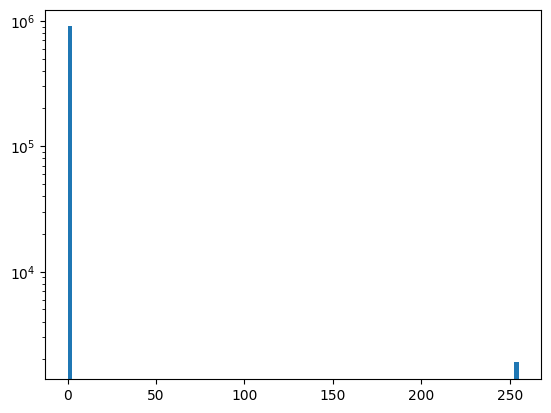

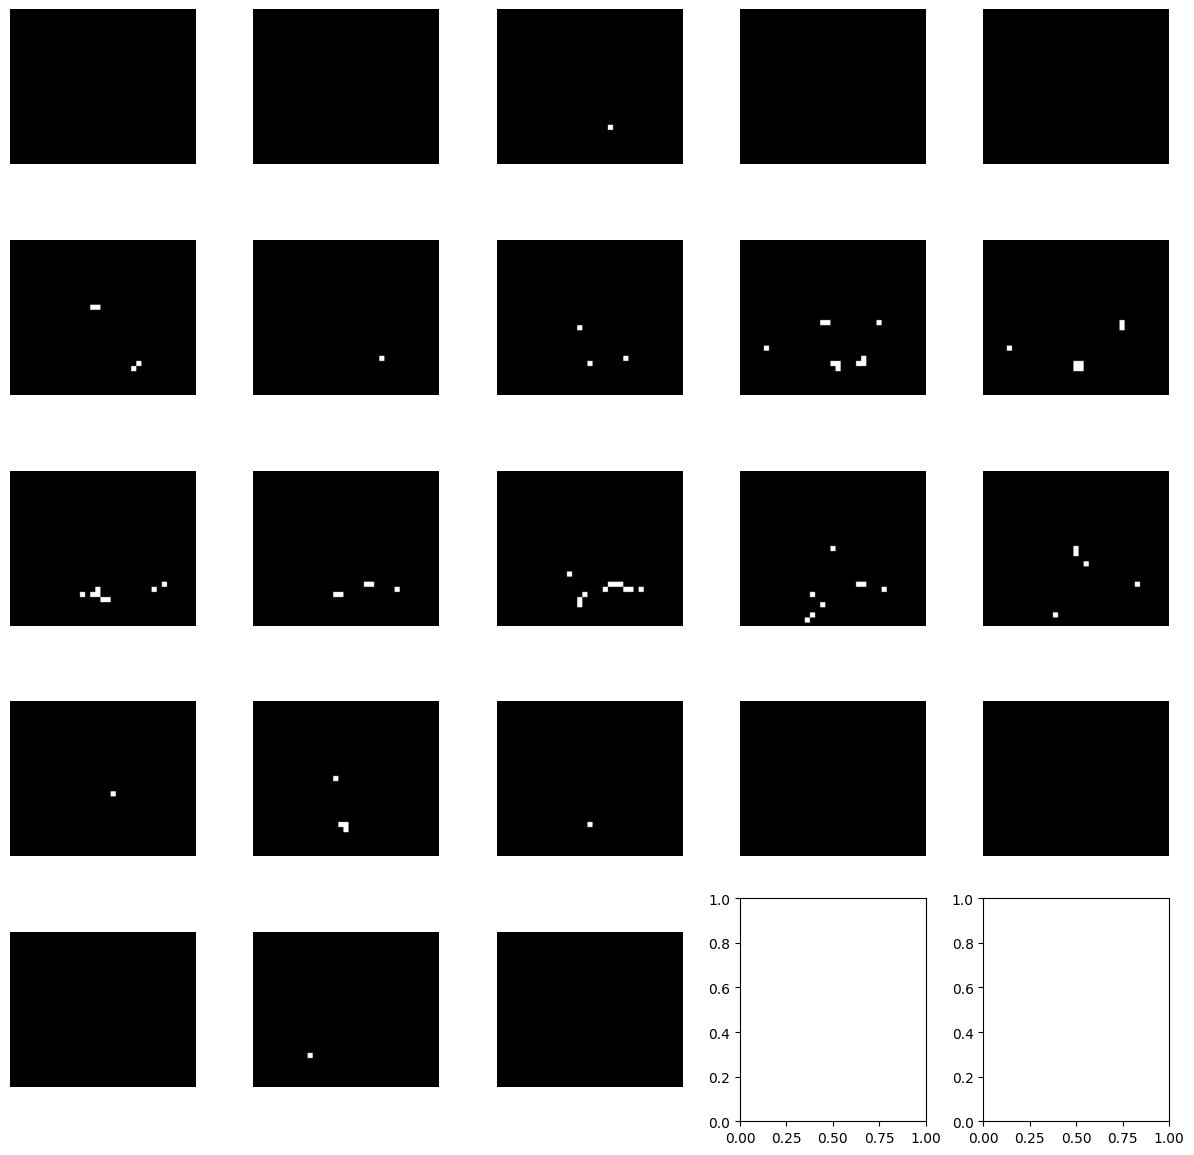

creating 3D plot...


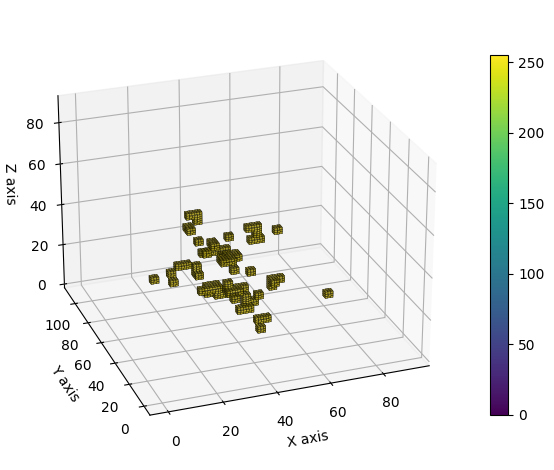

In [87]:
brain_vol = nib.load(os.path.join("../NIfTY_feature_masks/", "mask_c1_rc3_nof70.nii"))
markers = brain_vol.get_fdata()
print(brain_vol.header)

# make a histogram from a numpy array
plt.hist(markers.flatten(), bins=100, log=True)

# plots the 2D slices of the 3D volume
fig_rows = 5
fig_cols = 5
n_subplots = fig_rows * fig_cols
n_slice = markers.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[12, 12])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(markers[img, :, :], 90), cmap="gray")
    axs.flat[idx].axis("off")

plt.tight_layout()
plt.show()

# make a 3d plot of the brain volume
plot_3d_array_colored(markers, linewidth_voxel=0.2)